<font color = 'green'><h1>Visualising my health data</h1></font>

**Description of notebook:**

This notebook will be very straight fowards. All I want to do is eye ball my health data, which will require using the xml parsing script. 

I will also produce lists of available data etc.

I will not include echocardiograms for now

**Outline:**
1. Loading data and viewing the variables available
2. x
3. x
4. x
5.  x


**Ticket:**  [link to ticket]

**Epic:** [link to epic]

**Author:** Fergus Currie 

**Date:** 11-10-2022

-------------


<br>

<font color = 'green'><h2>Helper Functions</h2></font>

In [1]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def get_min_max_date_and_datetime_array(tmp):
    dates = []
    for i, row in tmp.iterrows():
        date = row['startDate'].split('-')
        year, month, day, hour, minute, sec = int(date[0]), int(date[1]), int(date[2].split(' ')[0]), int(date[2].split(' ')[1].split(':')[0]), int(date[2].split(' ')[1].split(':')[1]), int(date[2].split(' ')[1].split(':')[2])
        dates.append(datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=sec))
    
    # find min
    min_date, max_date =  datetime.datetime.max, datetime.datetime.min
    for date in dates:
        if date < min_date:
            min_date = date
        if date > max_date:
            max_date = date
    min_date, max_date 
    
    return dates, min_date, max_date

<br>

<font color = 'green'><h2>1. Loading data and viewing the variables available</h2></font>

In [2]:
import pandas as pd
from src.xml_parser import parse_export_cda, parse_export

df_cda = parse_export_cda("data/apple_health_export/export_cda.xml")
df_cda.columns

Index(['value', 'unit', 'display_name', 'effective_time_low',
       'effective_time_high'],
      dtype='object')

In [3]:
df_cda.display_name.value_counts()

Heart rate              15792
Respiratory rate         1374
Oxygen saturation         491
Body weight Measured       10
Height                      2
Name: display_name, dtype: int64

In [4]:
df = parse_export("data/apple_health_export/export.xml")
df.columns

0.000598794
0.000741314
0.000791225
0.000195318
0.000193866
0.000943433
0.000333632
0.000858061
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleepAnalysisInBed
HKCategoryValueSleep

Index(['type', 'creationDate', 'startDate', 'endDate', 'value'], dtype='object')

In [5]:
df.to_csv('data.csv')

In [9]:
df.type.value_counts()

HKQuantityTypeIdentifierDistanceWalkingRunning            39367
HKQuantityTypeIdentifierStepCount                         34549
HKQuantityTypeIdentifierActiveEnergyBurned                17257
HKQuantityTypeIdentifierBasalEnergyBurned                 17240
HKQuantityTypeIdentifierHeartRate                         15792
HKQuantityTypeIdentifierWalkingSpeed                      10849
HKQuantityTypeIdentifierWalkingStepLength                 10846
HKQuantityTypeIdentifierWalkingDoubleSupportPercentage    10192
HKQuantityTypeIdentifierFlightsClimbed                     9376
HKQuantityTypeIdentifierWalkingAsymmetryPercentage         5508
HKCategoryTypeIdentifierSleepAnalysis                      1487
HKQuantityTypeIdentifierAppleExerciseTime                  1434
HKQuantityTypeIdentifierRespiratoryRate                    1374
HKQuantityTypeIdentifierAppleStandTime                     1258
HKQuantityTypeIdentifierRunningSpeed                        930
HKQuantityTypeIdentifierRunningPower    

**Comments on section 1:**

First off we can see that export_cda is a subset of export. This makes things a bit easier. The data is in a time series format. Taking HKCategoryTypeIdentifierSleepAnalysis as example, each data point is a point in time with values such as Core, REM, Deep, InBed. 


----------

<br>

<font color = 'green'><h2>2. Heart Rate - Starting Simple</h2></font>

The goal here is to convert all heart rate types from df into a nice pandas time series

In [10]:
df[df.type == "HKQuantityTypeIdentifierHeartRate"]

,type,creationDate,startDate,endDate,value
12,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:01:09 +1300,2022-10-26 17:59:20 +1300,2022-10-26 17:59:20 +1300,72
13,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:06:17 +1300,2022-10-26 18:01:49 +1300,2022-10-26 18:01:49 +1300,69
14,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:07:24 +1300,2022-10-26 18:05:56 +1300,2022-10-26 18:05:56 +1300,88.7466
15,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:13:19 +1300,2022-10-26 18:07:56 +1300,2022-10-26 18:07:56 +1300,86
16,HKQuantityTypeIdentifierHeartRate,2022-10-26 18:16:12 +1300,2022-10-26 18:12:34 +1300,2022-10-26 18:12:34 +1300,92
...,...,...,...,...,...
15799,HKQuantityTypeIdentifierHeartRate,2022-11-21 18:02:40 +1300,2022-11-21 17:58:45 +1300,2022-11-21 17:58:45 +1300,68
15800,HKQuantityTypeIdentifierHeartRate,2022-11-21 18:08:26 +1300,2022-11-21 18:03:36 +1300,2022-11-21 18:03:36 +1300,72
15801,HKQuantityTypeIdentifierHeartRate,2022-11-21 18:13:07 +1300,2022-11-21 18:11:59 +1300,2022-11-21 18:11:59 +1300,84
15802,HKQuantityTypeIdentifierHeartRate,2022-11-21 18:19:19 +1300,2022-11-21 18:13:29 +1300,2022-11-21 18:13:29 +1300,72


first look at heart rate 

/var/folders/_4/vpd545r96790ls07tvhfkstm0000gn/T/ipykernel_70669/3095414486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)


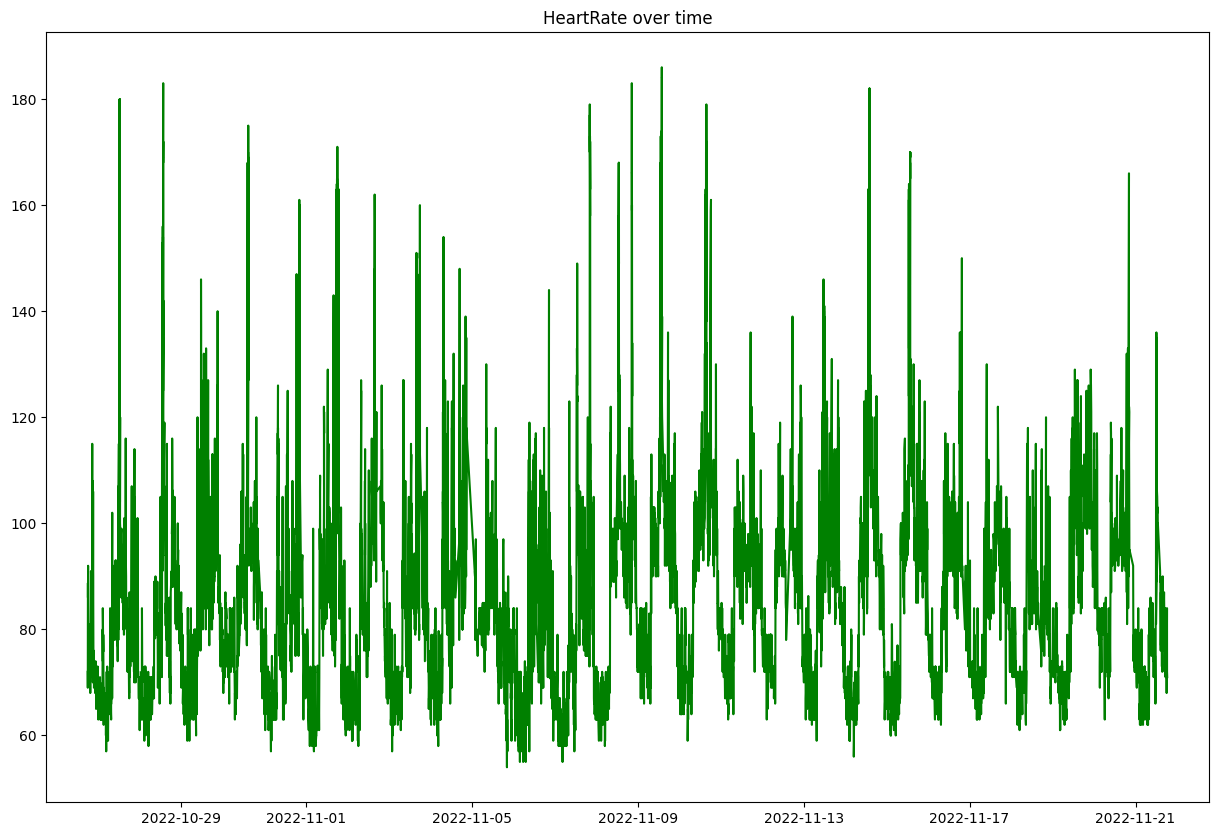

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierHeartRate"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('HeartRate over time')
plt.show()

/var/folders/_4/vpd545r96790ls07tvhfkstm0000gn/T/ipykernel_70669/3715612019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)


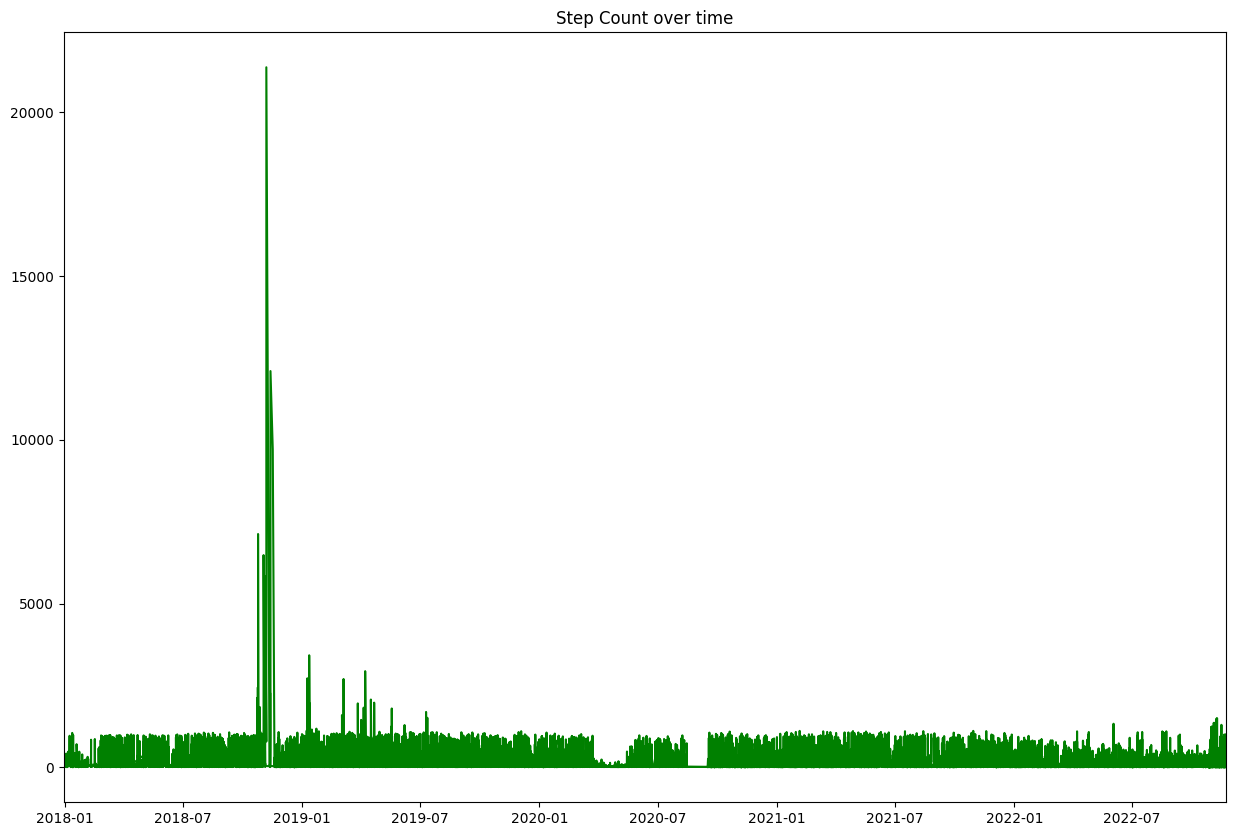

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierStepCount"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('Step Count over time')
plt.show()

^ odd results here. definetly expected to be higher. to check with actual data

/var/folders/_4/vpd545r96790ls07tvhfkstm0000gn/T/ipykernel_70669/2535142621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)


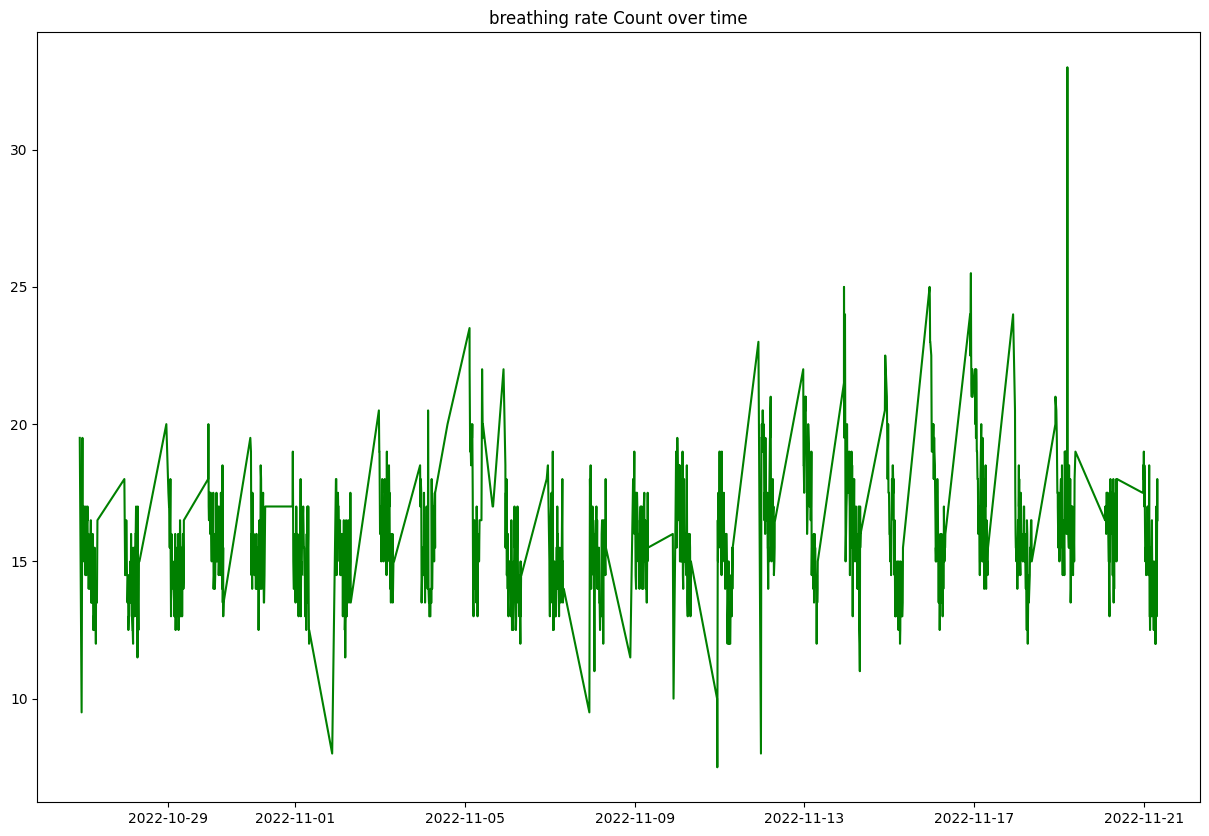

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierRespiratoryRate"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('breathing rate Count over time')
plt.show()

/var/folders/_4/vpd545r96790ls07tvhfkstm0000gn/T/ipykernel_70669/1231039059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)


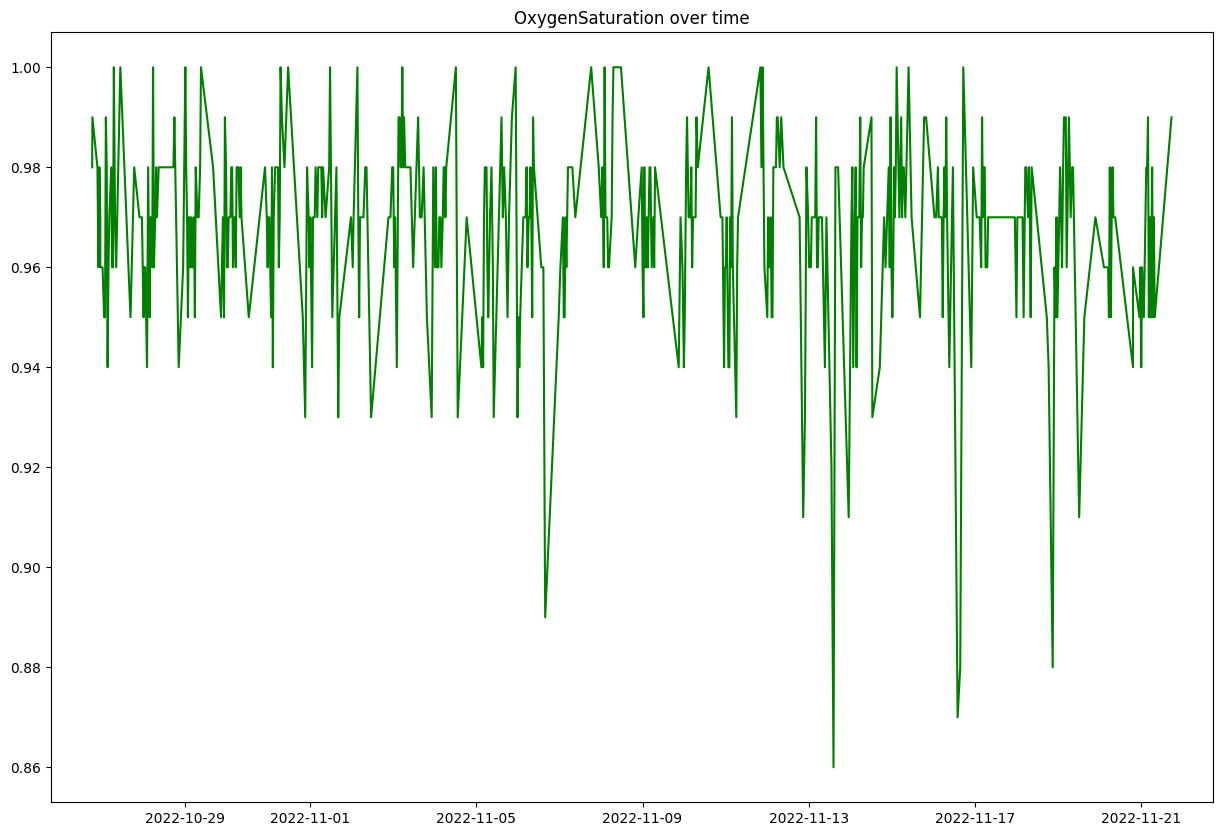

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierOxygenSaturation"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('OxygenSaturation over time')
plt.show()

/var/folders/_4/vpd545r96790ls07tvhfkstm0000gn/T/ipykernel_70669/1040932037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)


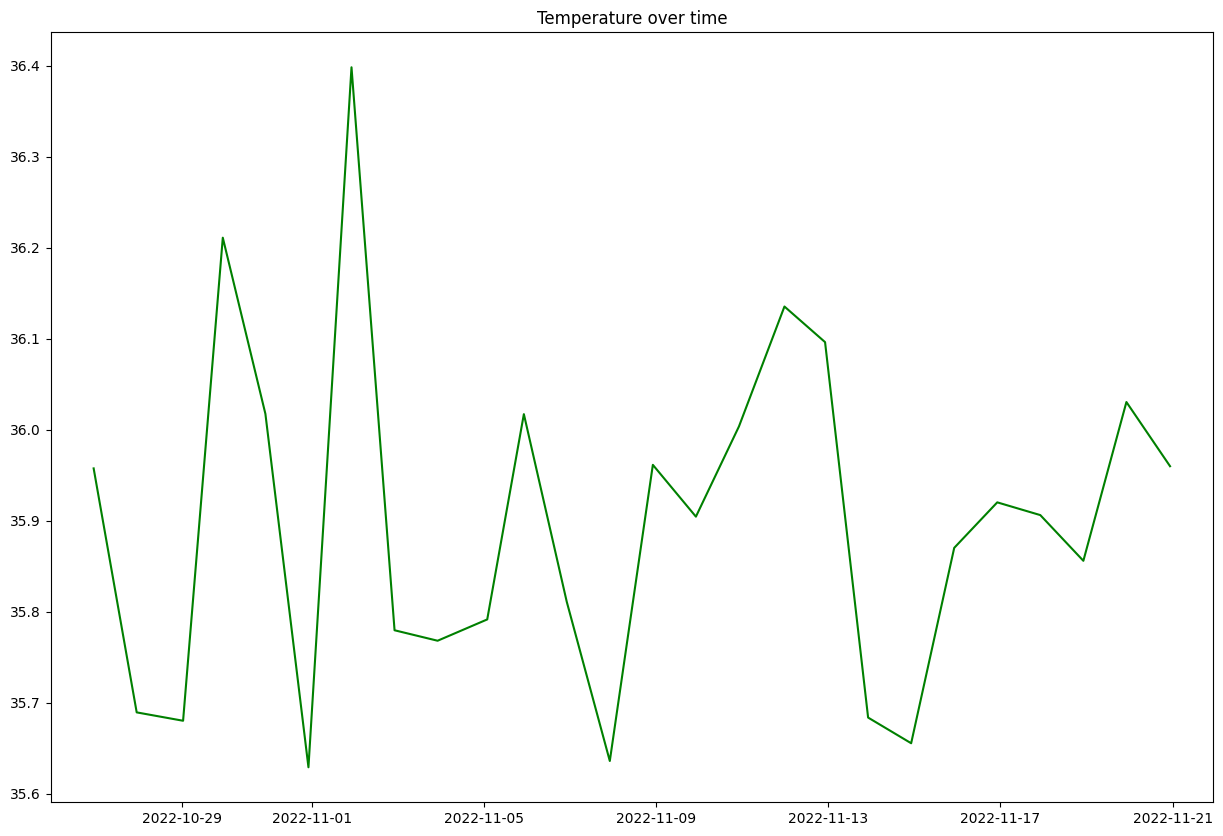

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierAppleSleepingWristTemperature"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('Temperature over time')
plt.show()

# sleep

HKCategoryTypeIdentifierSleepAnalysis
HKQuantityTypeIdentifierDietaryCaffeine

ValueError: could not convert string to float: 'HKCategoryValueSleepAnalysisInBed'

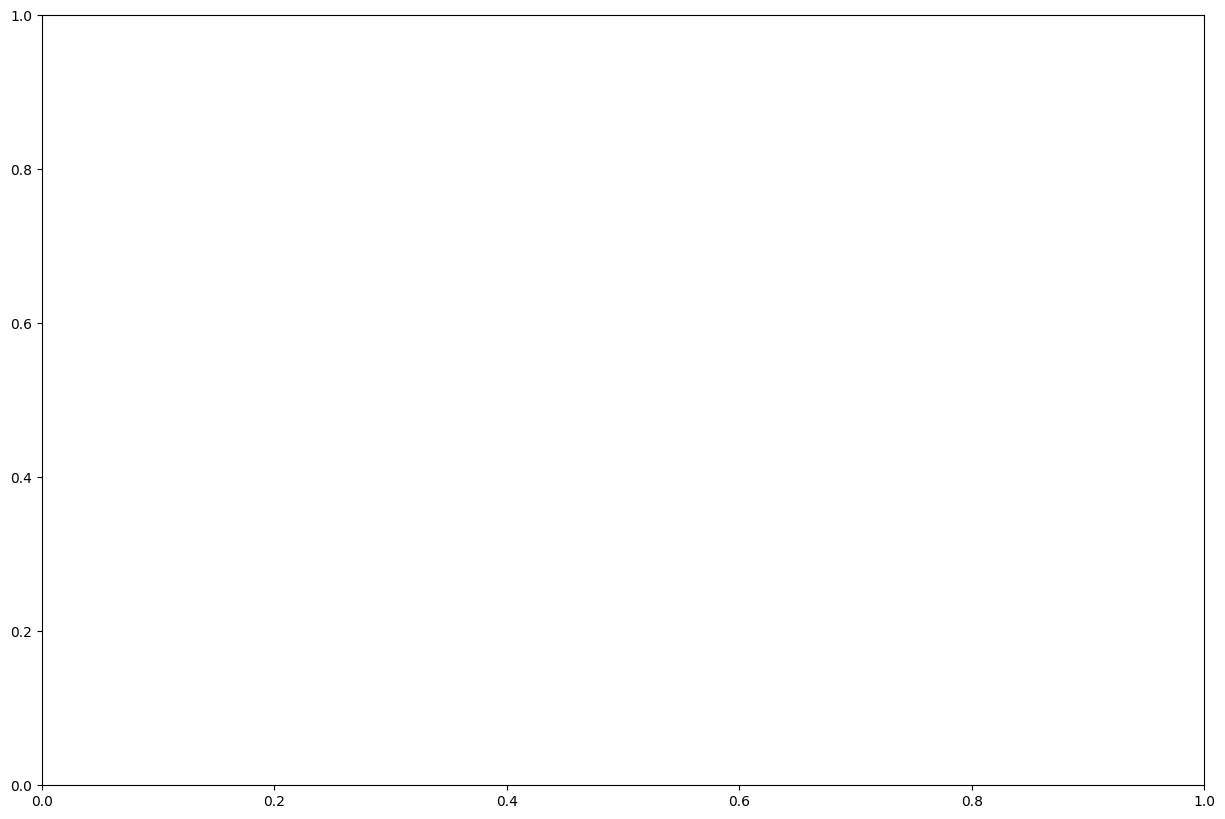

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKCategoryTypeIdentifierSleepAnalysis"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.scatter(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('HKCategoryTypeIdentifierSleepAnalysis over time')
plt.show()

/var/folders/_4/vpd545r96790ls07tvhfkstm0000gn/T/ipykernel_70669/3377096027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)


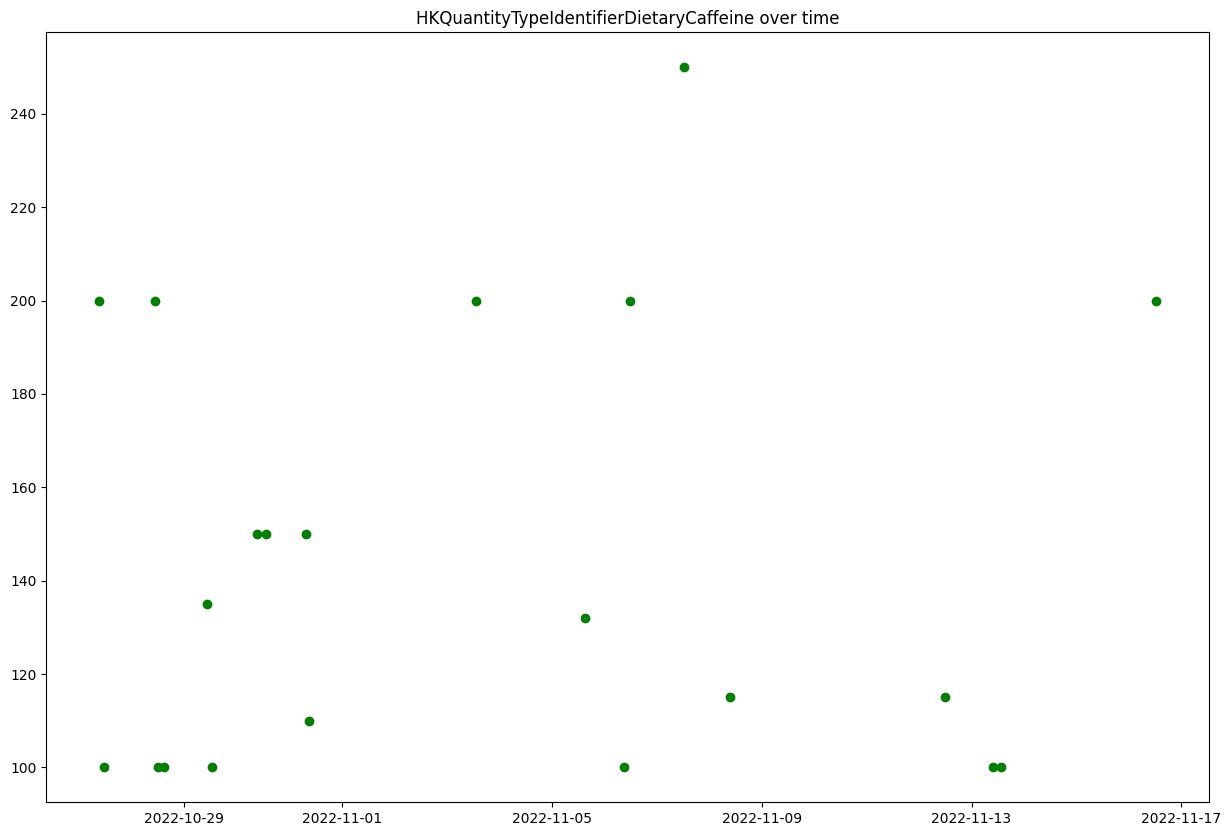

In [19]:

fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierDietaryCaffeine"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.scatter(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('HKQuantityTypeIdentifierDietaryCaffeine over time')
plt.show()

**Comments on section 1:**

The results show.


----------

<br>
<font color = 'green'><h2>3. [insert section three title here]</h2></font>

**Comments on section 1:**

The results show.


----------

<br>

<font color = 'green'><h2>4. [insert section four title here]</h2></font>

**Comments on section 1:**

The results show.


----------

<br>

<font color = 'green'><h2>5. [insert section five title here]</h2></font>

**Comments on section 1:**

The results show.


----------